# Dane Przestrzenne w Pythonie - wektory

| Metadane              | Wartość                                                                               |
|-----------------------|---------------------------------------------------------------------------------------|
| Kurs - adres YT       | [Dane Przestrzenne w Pythonie - wektory](https://www.youtube.com/watch?v=UXjz7j_0FmY) |
| Część kursu           | 7 - GeoAI                                                                             |
| Ostatnia aktualizacja | 2025-04-01                                                                            |
| Autor                 | Szymon Moliński                                                                       |

Projekt bazuje na: https://ml-gis-service.com/index.php/2021/03/19/data-science-feature-engineering-with-spatial-flavour/

In [1]:
import numpy as np
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # trzeba doinstalować + dodać do requirements.txt jeśli nie ma

from geopandas import points_from_xy

In [2]:
# Set project files
zip = "zip://"
dpath = "data/"

baseline_dataset = dpath + 'AB_NYC_2019.csv'
baseline_id_column = 'id'

boroughs = zip + dpath + 'nybbwi_20d.zip!nybbwi_20d/nybbwi.shp'
fire_divs = zip + dpath + 'nyfd_20d.zip!nyfd_20d/nyfd.shp'
health_cns = zip + dpath + 'nyhc_20d.zip!nyhc_20d/nyhc.shp'
police_prs = zip + dpath + 'nypp_20d.zip!nypp_20d/nypp.shp'
school_dis = zip + dpath + 'nysd_20d.zip!nysd_20d/nysd.shp'

In [3]:
df = pd.read_csv(baseline_dataset,
                 index_col=baseline_id_column)

In [4]:
df.sample(3)

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,,
17418177,"Spacious, Private 2 BR , 4 Bathrooms in Brooklyn",95341719,Estie,Brooklyn,Crown Heights,40.66971,-73.94351,Entire home/apt,275,1,26,2019-06-21,0.96,3,271
36174744,an L.E.S. Jewel-in-the-Crown of Chinatown!,2344295,Yoav,Manhattan,Lower East Side,40.71752,-73.99147,Private room,260,2,0,NaN,NaN,1,23
29412897,Large open space in Bushwick,1949282,Kyla,Brooklyn,Bushwick,40.69418,-73.91140,Private room,36,3,13,2019-06-15,1.51,5,329


In [5]:
# Spatial data sources

gdf_boroughs = gpd.read_file(boroughs)  # dzielnice
gdf_fire_divs = gpd.read_file(fire_divs)  # dystrykty straży pożarnej
gdf_police_prs = gpd.read_file(police_prs)  # dystrykty policji
gdf_school_dis = gpd.read_file(school_dis)  # dystrykty szkolne
gdf_health_cns = gpd.read_file(health_cns)  # dystrykty służby zdrowia

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   BoroCode    30 non-null     int32   
 1   BoroName    30 non-null     object  
 2   HCentDist   30 non-null     int32   
 3   Shape_Leng  30 non-null     float64 
 4   Shape_Area  30 non-null     float64 
 5   geometry    30 non-null     geometry
dtypes: float64(2), geometry(1), int32(2), object(1)
memory usage: 1.3+ KB
None
EPSG:2263


Text(0.5, 1.0, 'School Districts within main boroughs in the New York City.')

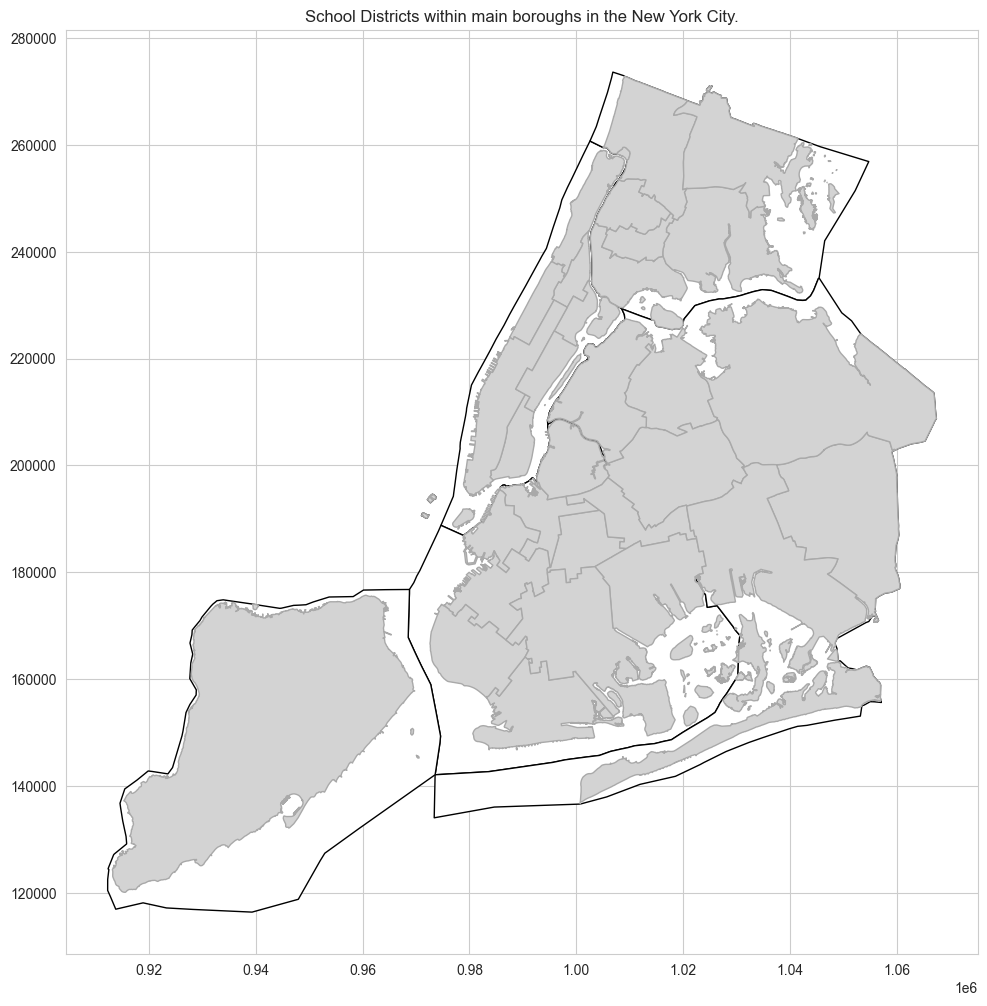

In [6]:

print(gdf_health_cns.info())
print(gdf_health_cns.crs)
base = gdf_boroughs.plot(color='white', edgecolor='black', figsize=(12, 12))
gdf_health_cns.plot(ax=base, color='lightgray', edgecolor='darkgray')
plt.title('School Districts within main boroughs in the New York City.')

# Transformacja zwykłej ramki danych do ramki danych przestrzennej

In [7]:
points = points_from_xy(x=df['longitude'], y=df['latitude'], crs="EPSG:4326")

In [8]:
df['geometry'] = points

In [9]:
gdf = gpd.GeoDataFrame(df[
      ['neighbourhood_group', 'neighbourhood', 'room_type', 'price',
      'minimum_nights', 'number_of_reviews','reviews_per_month',
      'calculated_host_listings_count', 'geometry']
    ])

In [10]:
# kroki wymagane w przygotowaniu danych do uczenia maszynowego

In [11]:
gdf.dropna(axis=0, inplace=True)

In [12]:
gdf.drop_duplicates(inplace=True)

In [13]:
type(gdf)

geopandas.geodataframe.GeoDataFrame

In [14]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [15]:
gdf.geometry

id
2539        POINT (-73.97237 40.64749)
2595        POINT (-73.98377 40.75362)
3831        POINT (-73.95976 40.68514)
5022        POINT (-73.94399 40.79851)
5099          POINT (-73.975 40.74767)
                       ...            
36425863    POINT (-73.95366 40.78099)
36427429    POINT (-73.81459 40.75104)
36438336    POINT (-74.14275 40.54179)
36442252      POINT (-73.924 40.80787)
36455809    POINT (-73.92801 40.69805)
Name: geometry, Length: 38843, dtype: geometry

In [16]:
gdf.to_crs(gdf_boroughs.crs, inplace=True)

In [17]:
gdf.geometry

id
2539         POINT (991917.303 175175.655)
2595         POINT (988746.648 213841.186)
3831         POINT (995410.267 188893.967)
5022          POINT (999757.55 230200.664)
5099         POINT (991177.064 211673.981)
                         ...              
36425863     POINT (997083.583 223815.962)
36427429     POINT (1035621.24 212955.159)
36438336     POINT (944574.248 136697.571)
36442252     POINT (1005289.243 233615.01)
36455809    POINT (1004212.028 193603.099)
Name: geometry, Length: 38843, dtype: geometry

# Cechy przestrzenne do analiz

## 1. Czy cena noclegu ma związek z dzielnicą?

Text(0.5, 1.0, 'Distribution of price in relation to categorical variables: Boroughs.')

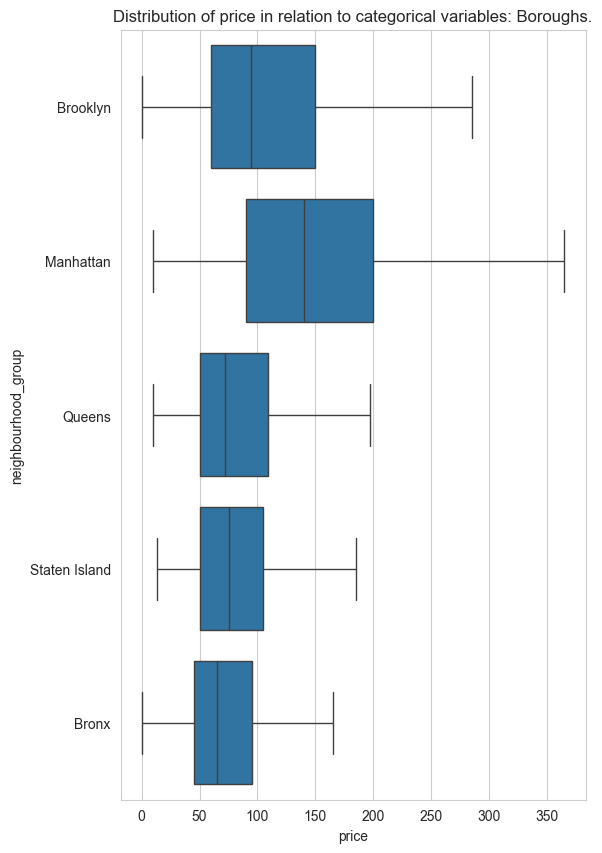

In [18]:
plt.figure(figsize=(6, 10))
sns.boxplot(y='neighbourhood_group', x='price',
            data=gdf, orient='h', showfliers=False)
plt.title('Distribution of price in relation to categorical variables: Boroughs.')

In [19]:
# Tak, ale bardzo ogólne i rozrzucone wyniki

## 2. Cena noclegu a odległość do centrum dzielnic

In [20]:
# centrum dzielnicy

gdf_boroughs['centroids'] = gdf_boroughs.centroid

In [21]:
# Stwórzmy kolumny numeryczne reprezentujące odległość do środka dzielnicy

for bname in gdf_boroughs['BoroName'].unique():
    district_name = 'cdist_' + bname
    cent = gdf_boroughs[gdf_boroughs['BoroName'] == bname]['centroids'].values[0]
    gdf[district_name] = gdf['geometry'].distance(cent)

In [22]:
# korelacja?

In [23]:
gdf.corrwith(gdf['price'], numeric_only=True).sort_values(ascending=False)

price                             1.000000
cdist_Queens                      0.096206
calculated_host_listings_count    0.052903
minimum_nights                    0.025506
cdist_Brooklyn                    0.011877
cdist_Bronx                       0.011227
reviews_per_month                -0.030608
number_of_reviews                -0.035938
cdist_Staten Island              -0.058386
cdist_Manhattan                  -0.146215
dtype: float64

## 3. Wykorzystanie dodatkowych informacji przestrzennych - dystrykty

In [25]:
# Zróbmy kopię ramki danych

ext_gdf = gdf.copy()

# straż pożarna

ext_gdf = gpd.sjoin(ext_gdf, gdf_fire_divs[['geometry', 'FireDiv']], how='left', predicate='within')
ext_gdf.drop('index_right', axis=1, inplace=True)

# służba zdrowia

ext_gdf = gpd.sjoin(ext_gdf, gdf_health_cns[['geometry', 'HCentDist']], how='left', predicate='within')
ext_gdf.drop('index_right', axis=1, inplace=True)

# policja

ext_gdf = gpd.sjoin(ext_gdf, gdf_police_prs[['geometry', 'Precinct']], how='left', predicate='within')
ext_gdf.drop('index_right', axis=1, inplace=True)

# szkoły

ext_gdf = gpd.sjoin(ext_gdf, gdf_school_dis[['geometry', 'SchoolDist']], how='left', predicate='within')
ext_gdf.drop('index_right', axis=1, inplace=True)

# We have to transform categorical columns to be sure that we don't get strange results

categorical_columns = ['FireDiv', 'HCentDist', 'Precinct', 'SchoolDist']
ext_gdf[categorical_columns] = ext_gdf[categorical_columns].astype('category')

In [26]:
ext_gdf.head()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,geometry,cdist_Manhattan,cdist_Bronx,cdist_Brooklyn,cdist_Queens,cdist_Staten Island,FireDiv,HCentDist,Precinct,SchoolDist
id,,,,,,,,,,,,,,,,,,
2539,Brooklyn,Kensington,Private room,149,1,9,0.21,6,POINT (991917.303 175175.655),46182.914879,80563.638555,7807.432320,42786.854075,55674.105361,11.0,35.0,66.0,15.0
2595,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,2,POINT (988746.648 213841.186),8432.465971,50190.715322,44336.683371,48413.839193,80871.440762,3.0,15.0,14.0,2.0
3831,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64,1,POINT (995410.267 188893.967),32583.380019,66660.392076,18581.518685,36235.078250,66528.427282,11.0,36.0,88.0,13.0
5022,Manhattan,East Harlem,Entire home/apt,80,10,9,0.10,1,POINT (999757.55 230200.664),11394.577971,31181.202905,59700.522624,50287.163135,100590.283644,3.0,12.0,23.0,4.0
5099,Manhattan,Murray Hill,Entire home/apt,200,3,74,0.59,1,POINT (991177.064 211673.981),9780.492163,50052.345013,41745.622622,45259.812279,80458.782993,3.0,13.0,17.0,2.0


### Rozkład cen w zależności od nowych kategorii

In [36]:
categorical_columns = ['FireDiv', 'HCentDist', 'Precinct', 'SchoolDist']
for col in categorical_columns:
    grouped = ext_gdf[['price', col]].groupby(col, observed=False)
    gmean = grouped.mean()
    var_gmean = np.var(gmean.values)
    print(f'Wariancja średniej ceny przypadającej na obszary ze zbioru {col}:', var_gmean)
    print('* - . - ')

Wariancja średniej ceny przypadającej na dystrykty ze zbioru FireDiv: 1735.3927053963837
* - . - 
Wariancja średniej ceny przypadającej na dystrykty ze zbioru HCentDist: 1498.1900683272695
* - . - 
Wariancja średniej ceny przypadającej na dystrykty ze zbioru Precinct: 2309.3438083500173
* - . - 
Wariancja średniej ceny przypadającej na dystrykty ze zbioru SchoolDist: 1071.2583978739658
* - . - 


In [38]:
for col in categorical_columns:
    grouped = ext_gdf[['price', col]].groupby(col, observed=False)
    gstd = grouped.std()
    var_gstd = np.var(gstd.values)
    print(f'Wariancja odchylenia standardowego ceny przypadającej na obszary ze zbioru {col}:', var_gstd)
    print('* - . - ')

Wariancja odchylenia standardowego ceny przypadającej na obszary ze zbioru FireDiv: 3430.8591509690177
* - . - 
Wariancja odchylenia standardowego ceny przypadającej na obszary ze zbioru HCentDist: 7116.640140165777
* - . - 
Wariancja odchylenia standardowego ceny przypadającej na obszary ze zbioru Precinct: 9550.670219373882
* - . - 
Wariancja odchylenia standardowego ceny przypadającej na obszary ze zbioru SchoolDist: 10107.500545243123
* - . - 
